# EDA

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [2]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('./통합데이터/강남구전세데이터_찐마지막.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AD_Code         87361 non-null  int64  
 1   Admin_District  87361 non-null  object 
 2   Area            87361 non-null  float64
 3   YearBuilt       87361 non-null  int64  
 4   Type            87361 non-null  object 
 5   Floor           87361 non-null  float64
 6   Address         87361 non-null  object 
 7   Cont_Date       87361 non-null  object 
 8   Age             87361 non-null  int64  
 9   Latitude        87361 non-null  float64
 10  Longitude       87361 non-null  float64
 11  Star_Cnt        87361 non-null  int64  
 12  Michelin_Cnt    87361 non-null  int64  
 13  Mc_cnt          87361 non-null  int64  
 14  Bigstore_cnt    87361 non-null  int64  
 15  InterestRate    87361 non-null  float64
 16  Market_cnt      87361 non-null  int64  
 17  Subway_cnt      87361 non-null 

In [4]:
# df.drop(columns = {'Unnamed: 0','금리년월일','금리년월일끝'}, inplace=True)

## 변수 분류
- 명목
    - Admin_District
    - Type
- 순서
- 이산
    - Floor
    - Star_Cnt
    - Michelin_Cnt
    - Mc_cnt
    - Bigstore_cnt
    - Market_cnt
    - Subway_cnt
- 연속
    - Area
    - Age
    - InterestRate

## 명목

### Type

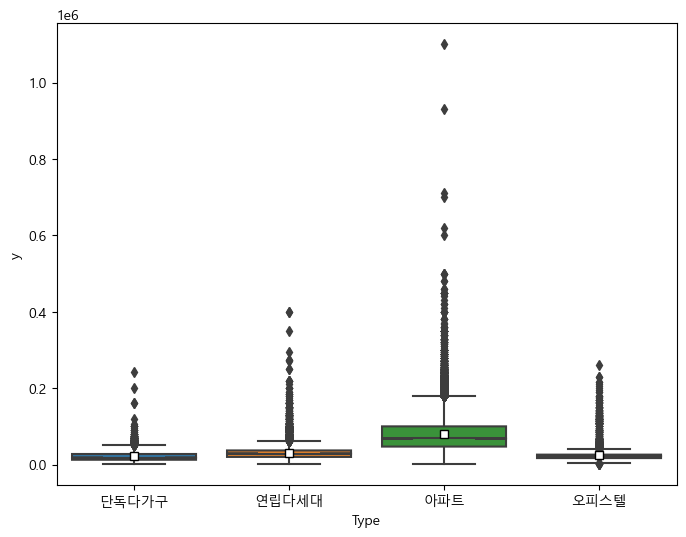

In [5]:
# df = df.loc[df['y'] < 800000]

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Type', y='y', data=df, notch=True, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})
plt.show()

# 각 수준에 대한 분포는 왼쪽으로 치우친 분포이다.
# 정규화(?)할 때 참고하면 된다.
# 모든 분포가 이상치를 가지고 있다.
# 특히 아파트가 많아 보인다.
# 정규화를 고려할 것이니 이상치는 일단 제거하지 않는다.
# y축 범위가 너무 넓어서 박스플롯에서 비교하기 힘들지만
# 아파트가 다른 Type에 비해 전세금이 높다.
# 이상치가 많은 데이터니 중심 추정치로 평균보다는 중앙값을 사용하는 것이 좋아보인다.

In [6]:
# 범위를 줄여서 박스플롯을 확인하자

# df_2 = df.loc[df['y'] < 200000]

# f, ax = plt.subplots(figsize=(8, 6))
# sns.boxplot(x='Type', y='y', data=df, notch=True, showmeans=True,
#             meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})
# plt.show()

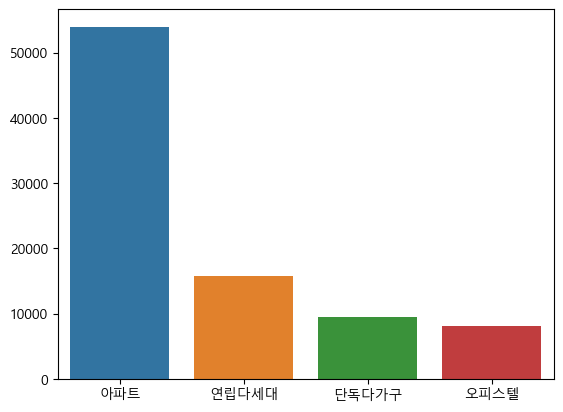

In [7]:
counts = df['Type'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.show()

# 아파트의 수가 가장 많다

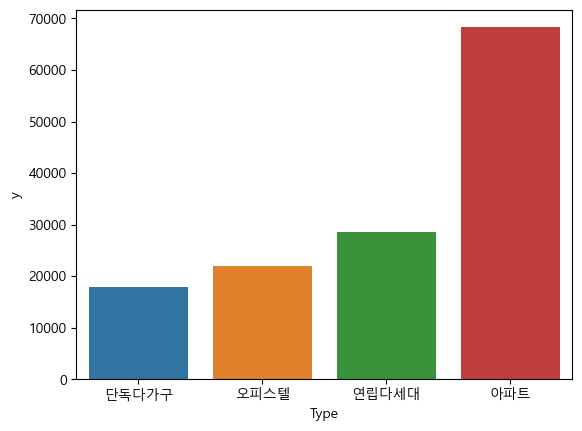

In [8]:
result = df.groupby(["Type"])['y'].aggregate(np.median).reset_index().sort_values('y')
sns.barplot(x=result['Type'], y=result['y'], data=df, order=result['Type'])
plt.show()

# 중앙값 역시 아파트가 가장 높다.

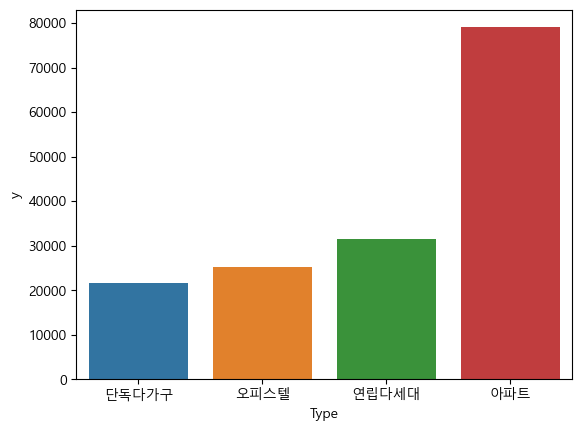

In [9]:
result = df.groupby(["Type"])['y'].aggregate(np.mean).reset_index().sort_values('y')
sns.barplot(x=result['Type'], y=result['y'], data=df, order=result['Type'])
plt.show()

# 평균도 한번 확인해보았다.

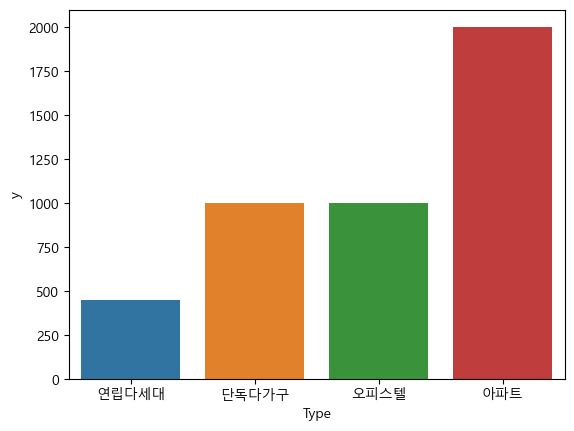

In [10]:
result = df.groupby(["Type"])['y'].aggregate(np.min).reset_index().sort_values('y')
sns.barplot(x=result['Type'], y=result['y'], data=df, order=result['Type'])
plt.show()

# 아파트 최소값이 다른 Type과 차이가 없다.
# 데이터 중 가장 많은 비율을 차지하며
# y값에 대부분의 범위를 가지고 있다.
# Type을 groupby했을 때 아파트를 우선적으로 분석하는 것이 좋다.

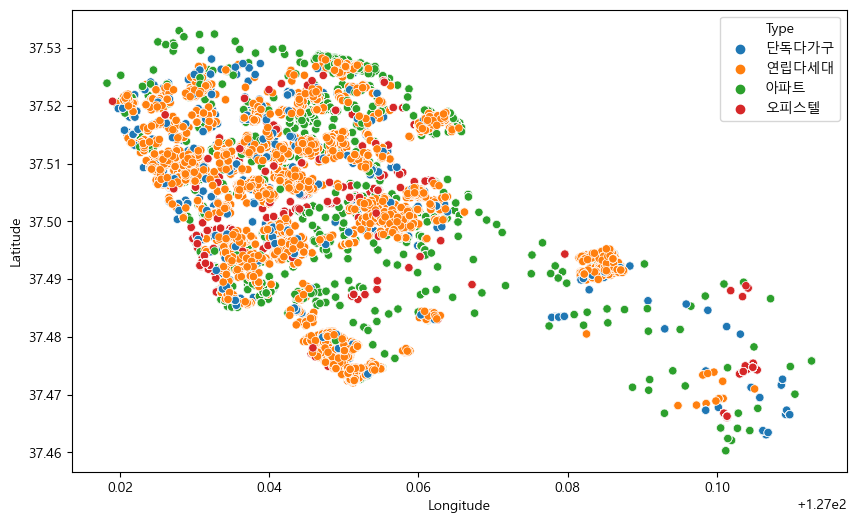

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Type')
plt.show()

### 행정구역

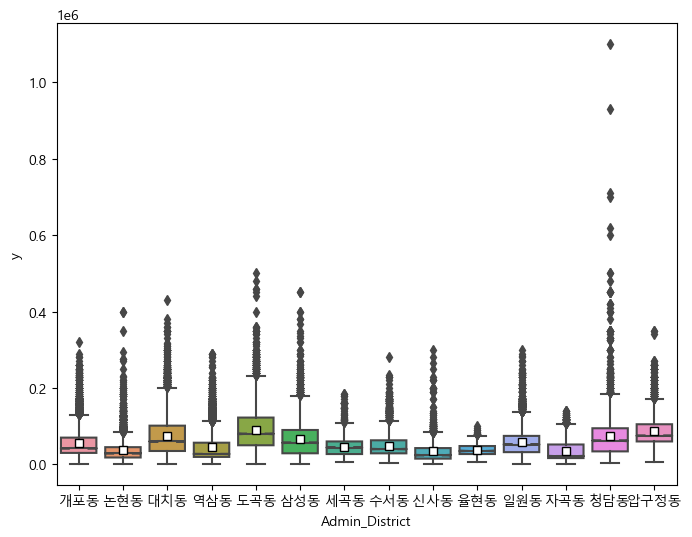

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Admin_District', y='y', data=df, notch=True, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})
plt.show()

# Type과 마찬가지로 왼쪽으로 치우친 분포다.
# 모든 분포가 이상치를 가지고 있다.
# 특히 청담동이 많아 보인다.
# 정규화를 고려할 것이니 이상치는 일단 제거하지 않는다.
# y축 범위가 너무 넓어서 박스플롯에서 비교하기 힘들지만
# 이상치가 많은 데이터니 중심 추정치로 평균보다는 중앙값을 사용하는 것이 좋아보인다.

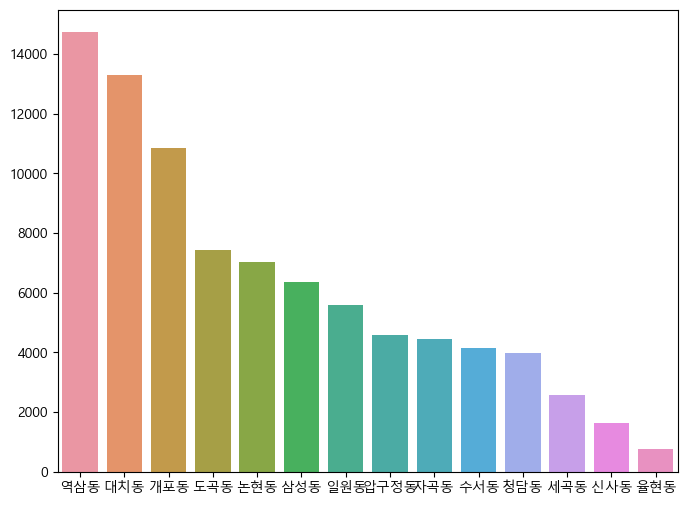

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
counts = df['Admin_District'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.show()

# 역삼동, 대치동, 개포동에 주택 수가 많다.

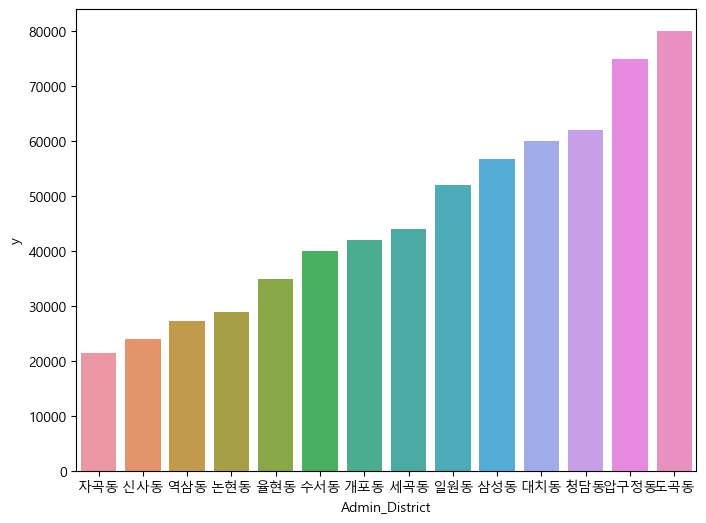

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
result = df.groupby(["Admin_District"])['y'].aggregate(np.median).reset_index().sort_values('y')
sns.barplot(x=result['Admin_District'], y=result['y'], data=df, order=result['Admin_District'])
plt.show()

# 중앙값은 도곡동 압구정동이 높았다.

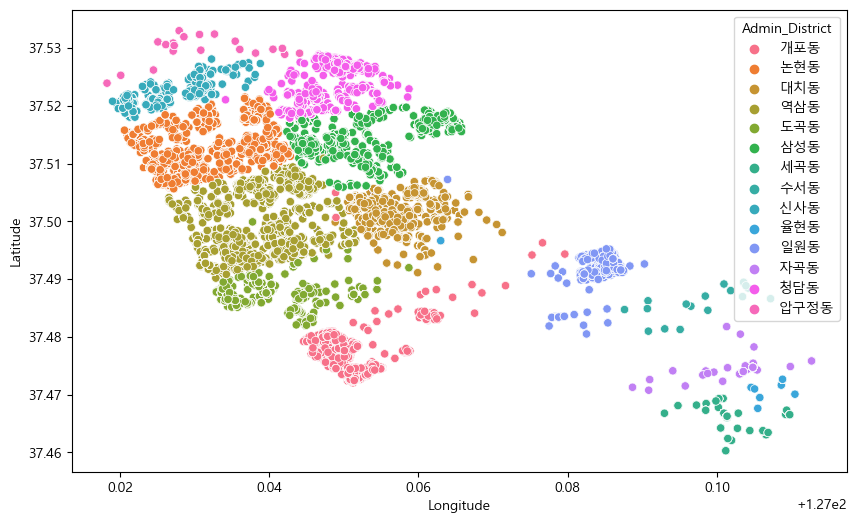

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Admin_District')
plt.show()

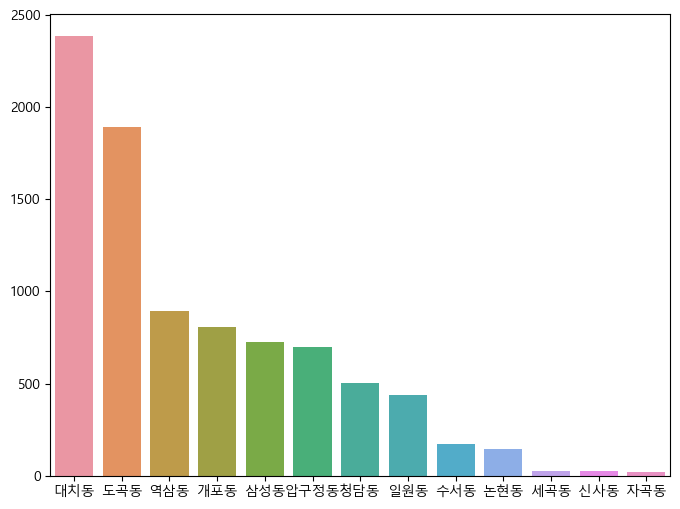

In [16]:
# 상위 10% 전세금은 어느 지역에 분포되어있을까??

df_Admin_District = df.sort_values('y', ascending=False).head(round(len(df)*0.1))

f, ax = plt.subplots(figsize=(8, 6))
counts = df_Admin_District['Admin_District'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.show()

# 상위 10% 전세금은 대치동, 도곡동에 많았다.

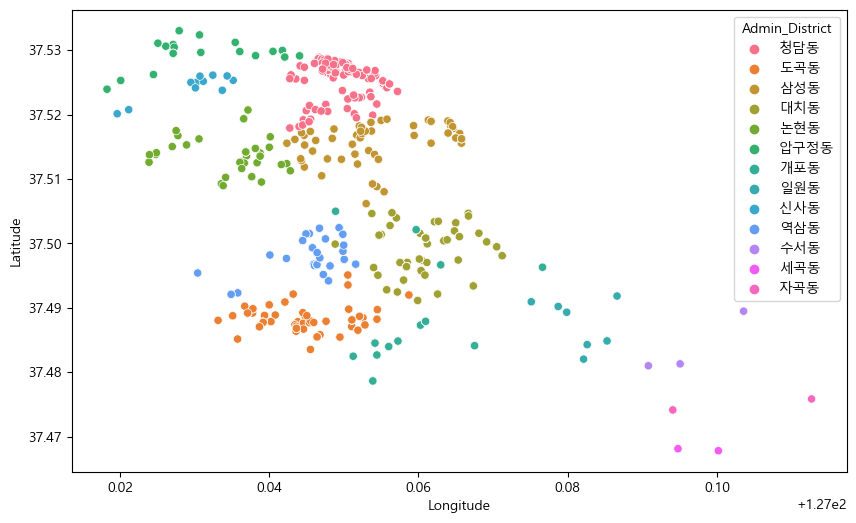

In [17]:
df_Admin_District = df.sort_values('y', ascending=False).head(round(len(df)*0.1))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Admin_District, x='Longitude', y='Latitude', hue='Admin_District')
plt.show()

# 상위 10%라 명확하게 보이지는 않는다.

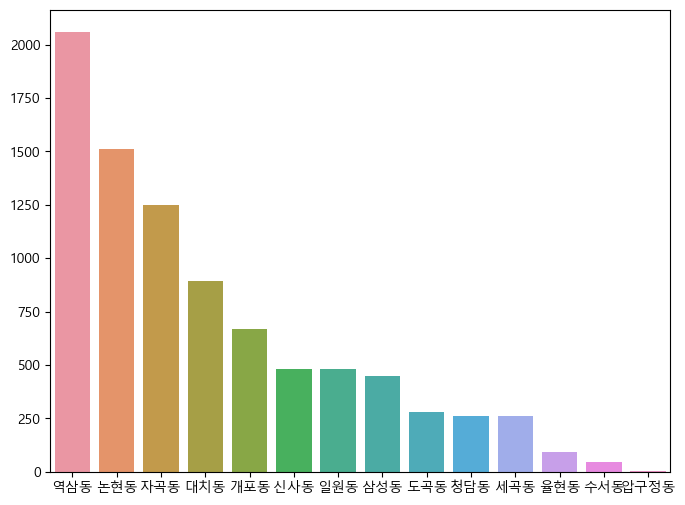

In [18]:
# 하위 10%도 구해보자

df_Admin_District = df.sort_values('y', ascending=True).head(round(len(df)*0.1))

f, ax = plt.subplots(figsize=(8, 6))
counts = df_Admin_District['Admin_District'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.show()

# 하위 10% 전세금은 역삼동, 논현동, 자곡동 순서이다.


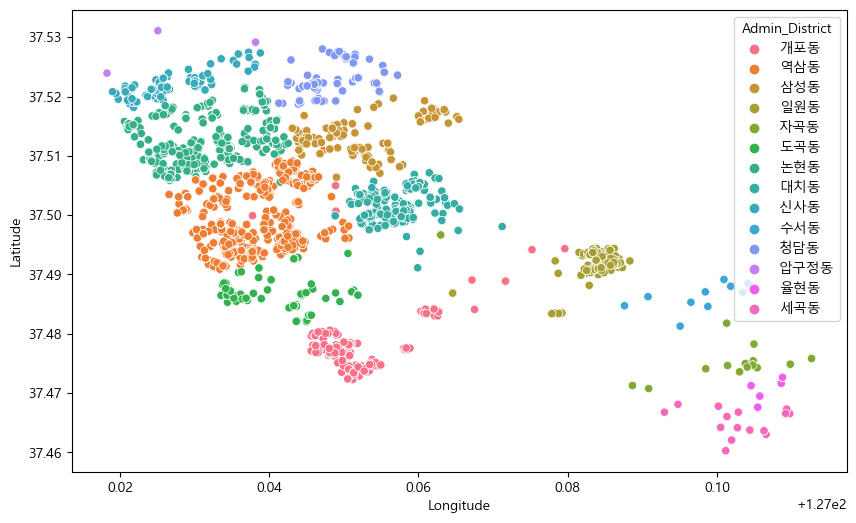

In [19]:
df_Admin_District = df.sort_values('y', ascending=True).head(round(len(df)*0.1))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Admin_District, x='Longitude', y='Latitude', hue='Admin_District')
plt.show()



In [20]:
# 각 수치별 행정구역 순서를 테이블로 정리해본다.

df_Admin_Table = pd.DataFrame()
df_Admin_Table['주택수'] = df.groupby(['Admin_District'])['y'].count().reset_index().sort_values('y', ascending=False)['Admin_District']
df_Admin_Table['중앙값'] = df.groupby(['Admin_District'])['y'].median().reset_index().sort_values('y', ascending=False)['Admin_District']
df_Admin_Table['평균값'] = df.groupby(['Admin_District'])['y'].mean().reset_index().sort_values('y', ascending=False)['Admin_District']
df_Admin_Table = df_Admin_Table.reset_index(drop=True)

df_head10 = df.sort_values('y', ascending=False).head(round(len(df)*0.1))
counts = df_head10['Admin_District'].value_counts().reset_index(drop=False)
counts = counts.rename(columns={'index':'상위10%'})
df_Admin_Table = pd.concat([df_Admin_Table, counts['상위10%']], axis=1)

df_head20 = df.sort_values('y', ascending=False).head(round(len(df)*0.2))
counts = df_head20['Admin_District'].value_counts().reset_index(drop=False)
counts = counts.rename(columns={'index':'상위20%'})
df_Admin_Table = pd.concat([df_Admin_Table, counts['상위20%']], axis=1)

df_head30 = df.sort_values('y', ascending=False).head(round(len(df)*0.3))
counts = df_head30['Admin_District'].value_counts().reset_index(drop=False)
counts = counts.rename(columns={'index':'상위30%'})
df_Admin_Table = pd.concat([df_Admin_Table, counts['상위30%']], axis=1)

df_tail10 = df.sort_values('y', ascending=True).head(round(len(df)*0.1))
counts = df_tail10['Admin_District'].value_counts().reset_index(drop=False)
counts = counts.rename(columns={'index':'하위10%'})
df_Admin_Table = pd.concat([df_Admin_Table, counts['하위10%']], axis=1)

df_Admin_Table

,주택수,중앙값,평균값,상위10%,상위20%,상위30%,하위10%
0,역삼동,역삼동,역삼동,대치동,대치동,대치동,역삼동
1,대치동,대치동,대치동,도곡동,도곡동,도곡동,논현동
2,개포동,개포동,개포동,역삼동,역삼동,역삼동,자곡동
3,도곡동,도곡동,도곡동,개포동,개포동,개포동,대치동
4,논현동,논현동,논현동,삼성동,압구정동,압구정동,개포동
5,삼성동,삼성동,삼성동,압구정동,삼성동,삼성동,신사동
6,일원동,일원동,일원동,청담동,청담동,청담동,일원동
7,압구정동,압구정동,압구정동,일원동,일원동,일원동,삼성동
8,자곡동,자곡동,자곡동,수서동,논현동,논현동,도곡동
9,수서동,수서동,수서동,논현동,수서동,수서동,청담동


In [21]:
df_Admin_Table.loc[13, '상위10%'] = '율현동'
df_Admin_Table

# 대치 도곡 역삼 개포
# 삼성 / 압구정
# 청담 일원
# 수서 / 논현
# 세곡 / 자곡 / 신사
# 율현

# 행정구역의 상위, 하위 순위를 점수로 매겨서 더하거나 평균을 내서 새로운 
# 특성변수로 사용할 수 있지 않을까....
# 상위, 중위, 하위로 나눌 수도 있을 듯
# 단점은 특성변수의 의미해석에 어려움이 있다.

,주택수,중앙값,평균값,상위10%,상위20%,상위30%,하위10%
0,역삼동,역삼동,역삼동,대치동,대치동,대치동,역삼동
1,대치동,대치동,대치동,도곡동,도곡동,도곡동,논현동
2,개포동,개포동,개포동,역삼동,역삼동,역삼동,자곡동
3,도곡동,도곡동,도곡동,개포동,개포동,개포동,대치동
4,논현동,논현동,논현동,삼성동,압구정동,압구정동,개포동
5,삼성동,삼성동,삼성동,압구정동,삼성동,삼성동,신사동
6,일원동,일원동,일원동,청담동,청담동,청담동,일원동
7,압구정동,압구정동,압구정동,일원동,일원동,일원동,삼성동
8,자곡동,자곡동,자곡동,수서동,논현동,논현동,도곡동
9,수서동,수서동,수서동,논현동,수서동,수서동,청담동


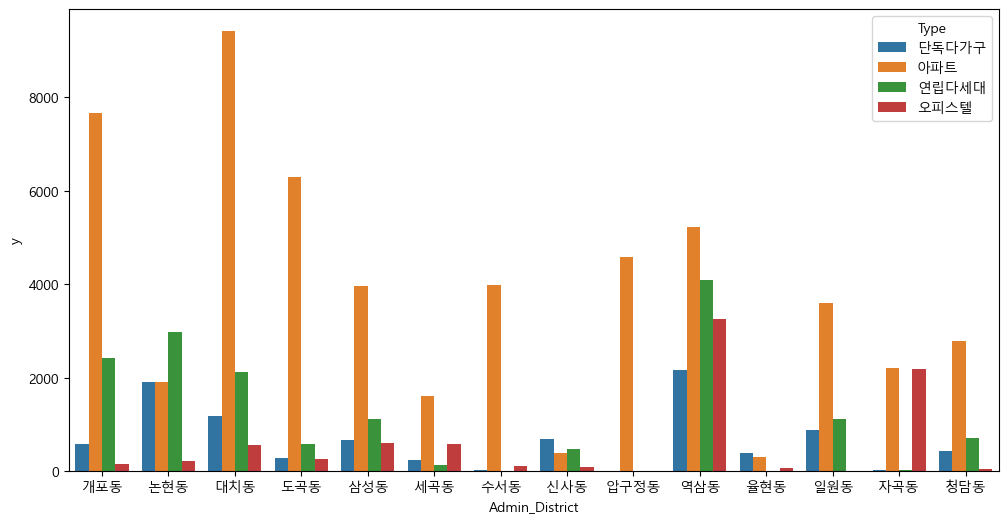

In [22]:
# Type변수를 확인할 때 아파트가 영향을 많이 끼칠것으로 예상되었는데..
# 아파트가 많은 행정구역을 파악해야하지 않을까??
# 대치 도곡 역삼 개포가 아파트가 많아서 상위 랭크를 차지하는 것일 수도 있으니까!!

df_Admin_groupby = df.groupby(['Admin_District','Type'])['y'].count().reset_index()
df_Admin_groupby

f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Admin_District', y="y", data=df_Admin_groupby, hue='Type')
plt.show()

# 대치 개포 도곡 역삼 순서네
# 개포 빼고는 순서가 맞는데?
# 모든 행정구역을 순서로 정리해서 만들어놓은 테이블에 합쳐 비교해보자

In [23]:
df_Admin_groupby = df.groupby(['Admin_District','Type'])['y'].count().reset_index()
df_Admin_groupby = df_Admin_groupby[df_Admin_groupby['Type']=='아파트']
df_Admin_groupby = df_Admin_groupby.sort_values('y', ascending=False).reset_index(drop=True)
df_Admin_groupby

df_Admin_Table = pd.concat([df_Admin_Table, df_Admin_groupby['Admin_District']], axis=1)
df_Admin_Table = df_Admin_Table.rename(columns={'Admin_District':'아파트수'})
df_Admin_Table

# 완전히 같지는 않지만 어느정도 순서를 따라간다
# 상위 10%는 극단값에 영향을 많이 받는다고 생각한다.
# 상위 20% 30%가 완전히 같은 순서를 갖는다는 것으로 유추할 수 있다.
# 따라서 아파트수와 비교할 때 상위20% 30% 자료에 좀 더 집중해서 해석한다.

,주택수,중앙값,평균값,상위10%,상위20%,상위30%,하위10%,아파트수
0,역삼동,역삼동,역삼동,대치동,대치동,대치동,역삼동,대치동
1,대치동,대치동,대치동,도곡동,도곡동,도곡동,논현동,개포동
2,개포동,개포동,개포동,역삼동,역삼동,역삼동,자곡동,도곡동
3,도곡동,도곡동,도곡동,개포동,개포동,개포동,대치동,역삼동
4,논현동,논현동,논현동,삼성동,압구정동,압구정동,개포동,압구정동
5,삼성동,삼성동,삼성동,압구정동,삼성동,삼성동,신사동,수서동
6,일원동,일원동,일원동,청담동,청담동,청담동,일원동,삼성동
7,압구정동,압구정동,압구정동,일원동,일원동,일원동,삼성동,일원동
8,자곡동,자곡동,자곡동,수서동,논현동,논현동,도곡동,청담동
9,수서동,수서동,수서동,논현동,수서동,수서동,청담동,자곡동


In [24]:
df_Admin_Table[['상위10%','상위20%','상위30%','아파트수']]

# 상위 10~30%자료를 통해 행정구역을 분류한다.
# 대치 / 도곡 / 역삼 / 개포
# 압구정 / 삼성
# 청담
# 일원
# 논현 / 수서
# 자곡 / 세곡 / 신사
# 율현

# 아파트수까지 비교하면 다음과 같이 분류할 수 있다.
# 대치 / 개포 / 도곡 / 역삼 - 순위에 변화가 있지만 그룹에 변화는 없다
# 압구정 / *수서 / 삼성 / - * 하위권이던 수서가 올라옴
# 일원 / 청담 - 일원과 청담의 순서가 바뀜
# 자곡 / 논현 / 세곡 / 신사 - 논현이 자곡과 세곡 사이로 내려옴
# 율현

# 순서가 조금씩 바뀌지만 큰 흐름은 따라가고 있다.

,상위10%,상위20%,상위30%,아파트수
0,대치동,대치동,대치동,대치동
1,도곡동,도곡동,도곡동,개포동
2,역삼동,역삼동,역삼동,도곡동
3,개포동,개포동,개포동,역삼동
4,삼성동,압구정동,압구정동,압구정동
5,압구정동,삼성동,삼성동,수서동
6,청담동,청담동,청담동,삼성동
7,일원동,일원동,일원동,일원동
8,수서동,논현동,논현동,청담동
9,논현동,수서동,수서동,자곡동


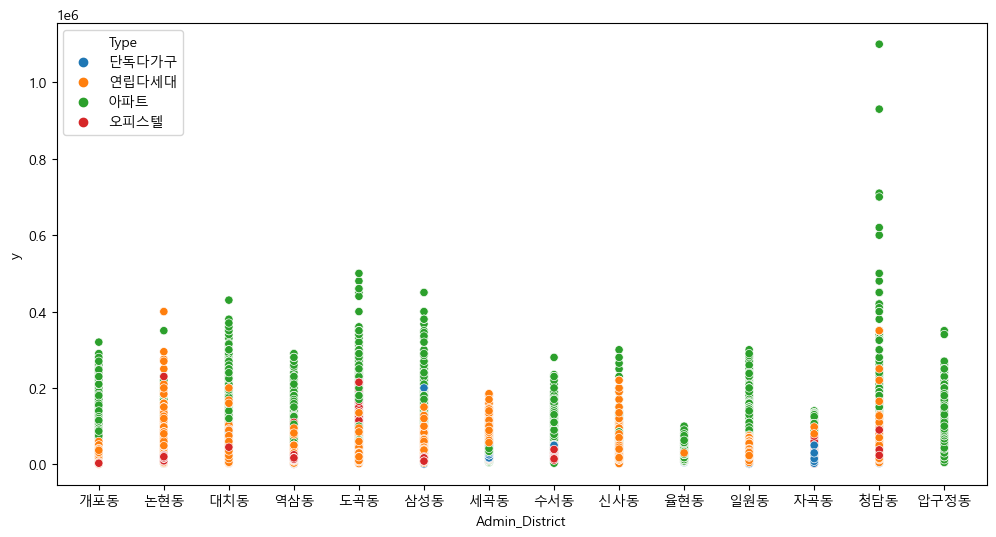

In [27]:
# 조금 더 시각적으로 확인할 수 없을까?

f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Admin_District', y="y", data=df, hue='Type')
plt.show()

# 높은 전세금은 아파트가 지배적이다.
# 이거 먼저 해볼껄..

## 문제를 기반으로 코드를 많이 집어넣어 보자!

## 문제: 전통시장이 역세권도 겹쳐있고 대규모 점포도 많음. 전세금과 관련있을까?

In [29]:
df.groupby(['Market_cnt'])['y'].median().sort_values(ascending=False).reset_index()

# 전통시장만 봤을 때 집 근처에 전통시장이 많을수록 전세금 중앙값이 작다.

,Market_cnt,y
0,0,47200.0
1,1,40000.0
2,2,19750.0


In [35]:
df.groupby(['Market_cnt','Star_Cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Star_Cnt'])

# 경향이 있는지는 파악할 수 없음

,Market_cnt,Star_Cnt,y
6,0,0,48000.0
4,0,1,52762.0
3,0,2,65000.0
7,0,3,45000.0
10,0,4,38000.0
13,0,5,33000.0
5,0,6,48300.0
9,0,7,40000.0
16,0,8,23000.0
18,0,9,22000.0


In [37]:
df.groupby(['Market_cnt','Michelin_Cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Michelin_Cnt'])

# 경향이 있는지는 파악할 수 없음

,Market_cnt,Michelin_Cnt,y
21,0,0,50000.0
29,0,1,32000.0
30,0,2,32000.0
19,0,3,55000.0
25,0,4,39000.0
28,0,5,35000.0
8,0,6,70000.0
20,0,7,52000.0
11,0,8,62000.0
16,0,9,56000.0


In [39]:
df.groupby(['Market_cnt','Mc_cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Mc_cnt'])

# Market_cnt이 1,2 일때 Mc_cnt이 커질수록 전세금중앙값은 커짐
# Market_cnt이 0일때 반대

,Market_cnt,Mc_cnt,y
2,0,0,50000.0
3,0,1,38000.0
5,0,2,24000.0
4,1,0,31000.0
1,1,1,68250.0
0,1,2,155000.0
7,2,0,18000.0
6,2,1,20000.0


In [40]:
df.groupby(['Market_cnt','Bigstore_cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Bigstore_cnt'])

# Bigstore_cnt이 커질수록 약간 작아지는 경향

,Market_cnt,Bigstore_cnt,y
4,0,0,46000.0
6,0,1,37200.0
0,0,2,68000.0
1,0,3,60000.0
2,0,4,52000.0
8,0,5,24150.0
3,1,0,50000.0
5,1,1,45000.0
7,1,2,30000.0
10,1,3,20000.0


In [41]:
df.groupby(['Market_cnt','Subway_cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Subway_cnt'])

# Subway_cnt 커질수록 약간 커지는 경향

,Market_cnt,Subway_cnt,y
6,0,0,40000.0
4,0,1,49350.0
2,0,2,59500.0
7,0,3,40000.0
5,1,0,40500.0
8,1,1,28000.0
1,1,2,99750.0
0,1,3,155000.0
9,2,1,19500.0
3,2,2,51000.0


### 세 개씩 그룹

In [46]:
df.groupby(['Market_cnt','Subway_cnt', 'Mc_cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Subway_cnt','Mc_cnt'])

# Market_cnt, Mc_cnt 고정 Subway_cnt를 기준으로 파악 - 약간 증가하는 경향
# Market_cnt, Subway_cnt 고정 Mc_cnt를 기준으로 파악 
    # - 0,0 ~ 1,0 까지 감소하는 경향 , 1,1 ~ 2,2 까지 증가하는 경향

,Market_cnt,Subway_cnt,Mc_cnt,y
10,0,0,0,46000.0
15,0,0,1,27000.0
16,0,0,2,26900.0
8,0,1,0,50000.0
9,0,1,1,48000.0
19,0,1,2,20000.0
6,0,2,0,63000.0
12,0,2,1,29400.0
17,0,2,2,25000.0
11,0,3,0,34000.0


In [50]:
df.groupby(['Market_cnt','Bigstore_cnt', 'Mc_cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Bigstore_cnt','Mc_cnt'])

# Market_cnt, Mc_cnt 고정 Bigstore_cnt 기준으로 파악 - 증가하다가 감소하는 경향도 있고 감소하는 경향도 있었음
# Market_cnt, Bigstore_cnt 고정 Mc_cnt를 기준으로 파악 
    # - 0,0 ~ 0,5 까지 감소하는 경향 , 1,0 ~ 2,2 까지 증가하는 경향

,Market_cnt,Bigstore_cnt,Mc_cnt,y
11,0,0,0,47250.0
12,0,0,1,43000.0
25,0,0,2,20790.0
9,0,1,0,55000.0
17,0,1,1,27000.0
18,0,1,2,25625.0
4,0,2,0,73000.0
7,0,2,1,63000.0
2,0,2,2,110000.0
5,0,3,0,67000.0


In [52]:
df.groupby(['Market_cnt','Subway_cnt', 'Bigstore_cnt'])['y'].median().sort_values(ascending=False).reset_index().sort_values(['Market_cnt','Subway_cnt','Bigstore_cnt'])

# Market_cnt, Subway_cnt 고정 Bigstore_cnt 기준으로 파악 - 증감하긴 하지만 전체적으로 약간 감소하는 경향
# Market_cnt, Bigstore_cnt 고정 Subway_cnt 기준으로 파악 
    # - 감소하다 증가하는 경향? 아무 경향이 없다고 판단하는게 좋을지도

,Market_cnt,Subway_cnt,Bigstore_cnt,y
15,0,0,0,46000.0
22,0,0,1,26000.0
10,0,0,2,53850.0
4,0,0,3,77000.0
21,0,0,5,26617.5
16,0,1,0,42500.0
14,0,1,1,50000.0
6,0,1,2,75000.0
9,0,1,3,55000.0
11,0,1,4,52500.0


## 변수 분류
- 명목
    - Admin_District
    - Type
- 순서
- 이산
    - Floor
    - Star_Cnt
    - Michelin_Cnt
    - Mc_cnt
    - Bigstore_cnt
    - Market_cnt
    - Subway_cnt
    - Kinder_cnt
- 연속
    - Area
    - Age
    - InterestRate